In [43]:
#Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file = "Resources/All_rest_2018.csv"
rest_df = pd.read_csv(file)
rest_df.head()

,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Categories,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,Chipotle Mexican Grill,346 W Magnolia Ave,Auburn,Alabama,36832,US,32.606813,-85.487328,NaN,24509.0,23.7,27638.0,22390.0,9821.0,40.070994
1,Chipotle Mexican Grill,300 20th St S,Birmingham,Alabama,35233,US,33.509722,-86.802756,NaN,1715.0,27.7,41500.0,29812.0,655.0,38.192420
2,Chipotle Mexican Grill,3220 Morrow Rd,Birmingham,Alabama,35235,US,33.595581,-86.647437,NaN,20926.0,38.0,55609.0,25477.0,2829.0,13.519067
3,Chipotle Mexican Grill,4719 Highway 280,Birmingham,Alabama,35242,US,33.422582,-86.698279,NaN,55122.0,40.9,91966.0,51709.0,3641.0,6.605348
4,Chipotle Mexican Grill,1821 Cherokee Ave SW,Cullman,Alabama,35055,US,34.154134,-86.841220,NaN,20884.0,38.4,42252.0,23465.0,3202.0,15.332312


In [31]:
#Create dataframe for Chipotle, McDonald's and YUM

# chipotle_age_values = rest_df['Median Age'].loc[(rest_df['Name'] == "Chipotle Mexican Grill")]
# mcdonalds_age_values = rest_df['Median Age'].loc[(rest_df['Name'] == "McDonald's")]
# yum_age_values = rest_df['Median Age'].loc[(rest_df['Name'] == "Taco Bell") |
#                                            (rest_df['Name'] == "Pizza Hut") |
#                                            (rest_df['Name'] == "KFC")]

chipotle_df = rest_df.loc[(rest_df['Name'] == "Chipotle Mexican Grill")]
mcdonalds_df = rest_df.loc[(rest_df['Name'] == "McDonald's")]
yum_df = rest_df.loc[(rest_df['Name'] == "Taco Bell") |
                    (rest_df['Name'] == "Pizza Hut") |
                    (rest_df['Name'] == "KFC")]


,Name,Address,City,State,Zip Code,Country,Latitude,Longitude,Categories,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Median Age Ranges
2631,Taco Bell,206 Wears Valley Rd,Pigeon Forge,TN,37863,US,35.803788,-83.580553,Fast Food Restaurant,6903.0,44.4,41146.0,19996.0,937.0,13.573808,41-45
2667,Taco Bell,1601 W Kirby St,Wylie,TX,75098,US,33.007329,-96.554127,Fast Food Restaurant and Mexican Restaurant,56764.0,33.9,93511.0,32776.0,3543.0,6.241632,30-35
2668,Taco Bell,7425 S Broadway Ave,Tyler,TX,75703,US,32.274786,-95.306757,Fast Food Restaurant,41842.0,36.3,57934.0,36218.0,4067.0,9.719899,36-40
2709,Pizza Hut,1439 S US Highway 1,Fort Pierce,FL,34950,US,27.435700,-80.326000,Fast Food Restaurants,17027.0,32.7,25278.0,15522.0,6514.0,38.256886,30-35
2714,Pizza Hut,2750 W 68th St Ste 104,Hialeah,FL,33016,US,25.882938,-80.338680,Fast Food,51003.0,41.0,44330.0,21454.0,9116.0,17.873458,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11150,Pizza Hut,3460 Robinhood Rd,Winston-Salem,NC,27106,US,36.117563,-80.316553,Fast Food Restaurants,48351.0,36.7,49947.0,35959.0,8233.0,17.027569,36-40
11151,Pizza Hut,3069 Kernersville Rd,Winston-Salem,NC,27107,US,36.077718,-80.176748,Fast Food Restaurants,47610.0,35.4,42787.0,22059.0,12051.0,25.311909,30-35
11152,Pizza Hut,838 S Main St,Kernersville,NC,27284,US,36.111015,-80.089165,Fast Food Restaurants,54413.0,42.7,61071.0,31974.0,6184.0,11.364931,41-45
11153,Pizza Hut,1702 Glendale Dr SW,Wilson,NC,27893,US,35.719981,-77.945795,Fast Food Restaurants,39372.0,38.1,34210.0,19058.0,11414.0,28.990145,36-40


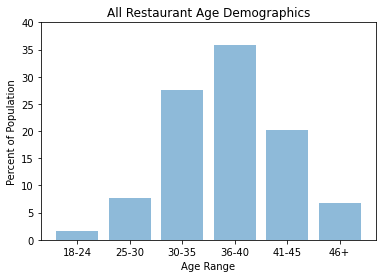

In [70]:
#Determine age bins for each restaurant

rest_df['Median Age'].min()
#min value = 19
rest_df['Median Age'].max()
#max value = 86

#Create bins for each age group 

bins = [18, 25, 31, 36, 41, 46, 9999]
group_names = ["18-24", "25-30", "30-35", "36-40", "41-45", "46+"]

#Create age groupings data frame

rest_df['Median Age Ranges'] = pd.cut(rest_df['Median Age'], bins, labels=group_names, include_lowest=True)

age_range_group = rest_df.groupby(['Median Age Ranges', ''])

#Determine percentage in age group

rest_age_count = age_range_group.count()

rest_age_percent = (rest_age_count['Name']/rest_age_count['Name'].sum())*100

rest_age_df = pd.DataFrame({"Total Count": rest_age_count["Name"],
                       "Percent": rest_age_percent})

#Create bar gaph with info

plt.bar(group_names, rest_age_df['Percent'], alpha=0.5, align='center')
plt.ylim(0, 40)
plt.title("All Restaurant Age Demographics")
plt.xlabel("Age Range")
plt.ylabel("Percent of Population")
plt.show()

<ipython-input-71-b6b9196f6edc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipotle_df['Median Age Ranges'] = pd.cut(chipotle_df['Median Age'], bins, labels=group_names, include_lowest=True)


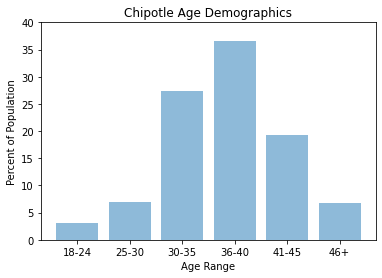

In [71]:
# Create Chipotle age groupings

chipotle_df['Median Age Ranges'] = pd.cut(chipotle_df['Median Age'], bins, labels=group_names, include_lowest=True)

chipotle_age_group = chipotle_df.groupby('Median Age Ranges')

chipotle_age_count = chipotle_age_group.count()

chipotle_percent = (chipotle_age_count['Name']/chipotle_age_count['Name'].sum())*100
chipotle_percent

chipotle_age_df = pd.DataFrame({"Total Count": chipotle_age_count["Name"],
                       "Chipotle Percent": chipotle_percent})

#Create bar graph for Chipotle age range percents

plt.bar(group_names, chipotle_age_df['Chipotle Percent'], alpha=0.5, align='center')
plt.ylim(0, 40)
plt.title("Chipotle Age Demographics")
plt.xlabel("Age Range")
plt.ylabel("Percent of Population")
plt.show()

<ipython-input-72-549a5a32b83c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_df['Median Age Ranges'] = pd.cut(mcdonalds_df['Median Age'], bins, labels=group_names, include_lowest=True)


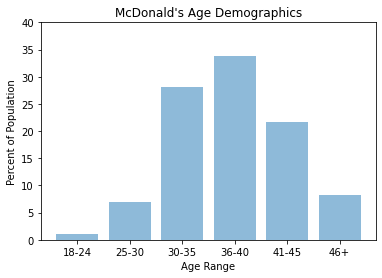

In [72]:
# Create McDonald's age groupings

mcdonalds_df['Median Age Ranges'] = pd.cut(mcdonalds_df['Median Age'], bins, labels=group_names, include_lowest=True)

mcdonalds_age_group = mcdonalds_df.groupby('Median Age Ranges')

mcdonalds_age_count = mcdonalds_age_group.count()

mcdonalds_percent = (mcdonalds_age_count['Name']/mcdonalds_age_count['Name'].sum())*100

mcdonalds_age_df = pd.DataFrame({"Total Count": mcdonalds_age_count["Name"],
                       "McDonald's Percent": mcdonalds_percent})

plt.bar(group_names, mcdonalds_age_df["McDonald's Percent"], alpha=0.5, align='center')
plt.ylim(0, 40)
plt.title("McDonald's Age Demographics")
plt.xlabel("Age Range")
plt.ylabel("Percent of Population")
plt.show()

<ipython-input-73-94d407b0187e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yum_df['Median Age Ranges'] = pd.cut(yum_df['Median Age'], bins, labels=group_names, include_lowest=True)


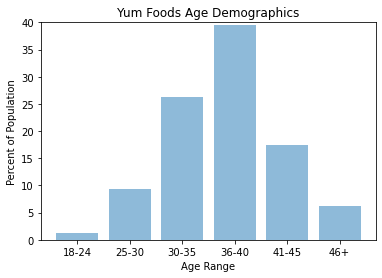

In [73]:
# Create YUM age groupings

yum_df['Median Age Ranges'] = pd.cut(yum_df['Median Age'], bins, labels=group_names, include_lowest=True)

yum_age_group = yum_df.groupby('Median Age Ranges')

yum_age_count = yum_age_group.count()

yum_percent = (yum_age_count['Name']/yum_age_count['Name'].sum())*100

yum_age_df = pd.DataFrame({"Total Count": yum_age_count["Name"],
                       "Yum Percent": yum_percent})

plt.bar(group_names, yum_age_df["Yum Percent"], alpha=0.5, align='center')
plt.ylim(0, 40)
plt.title("Yum Foods Age Demographics")
plt.xlabel("Age Range")
plt.ylabel("Percent of Population")
plt.show()